O caixeiro com gasolina infinita (e sem conciência ambiental)
========================================



## Introdução



No problema do caixeiro viajante, vimos como utilizar um algoritmo genético para encontrar o trajeto de menor distância para percorrer as cidades. Agora queremos fazer o contrário: encontrar o PIOR caminho possível. Esse também é um problema do tipo NP-difícil, e preticamente equivalente ao do caixeiro viajente normal.<br>
Em termos de algoritmo genético, a diferença é que agora precisamos mudar a função de seleção, para que favoreça os indivíduos com maior distÂncia.



## Importações



In [1]:
import random
import matplotlib.pyplot as plt
import networkx as nx
from itertools import permutations
from funcoes import cria_cidades
from funcoes import populacao_inicial_cv
from funcoes import funcao_objetivo_cv as funcao_objetivo_individuo
from funcoes import funcao_objetivo_pop_cv
from funcoes import selecao_torneio_max
from funcoes import cruzamento_ordenado as funcao_cruzamento
from funcoes import mutacao_de_troca as funcao_mutacao

## Códigos e discussão



In [2]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 50
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3
NUM_GERACOES = 150

# relacionadas ao problema a ser resolvido
CIDADES = cria_cidades(10)
NUM_GENES = len(CIDADES)

In [3]:
# funções locais (para não ter que colocar as variaveis locais no script
def cria_populacao_inicial(tamanho, nada):
    return populacao_inicial_cv(tamanho, CIDADES)

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_cv(populacao, CIDADES)

def funcao_selecao(populacao, fitness):
    return selecao_torneio_max(populacao, fitness, NUM_COMBATENTES_NO_TORNEIO)

In [4]:
# Busca por algoritmo genético

populacao = cria_populacao_inicial(TAMANHO_POP, NUM_GENES)

melhor_fitness_ja_visto = 0  # é assim que escrevemos infinito em python

lista_melhor_fitness = []

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = max(fitness)
    if maior_fitness > melhor_fitness_ja_visto:        
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness    
    lista_melhor_fitness.append(melhor_fitness_ja_visto)

In [5]:
# Busca testando todas as permutações

melhor_fitness_ever = 0

# testando todas as permutações possíveis
for caminho in permutations(list(CIDADES.keys())):
    distancia = funcao_objetivo_individuo(caminho, CIDADES)
    if distancia > melhor_fitness_ever:
        melhor_fitness_ever = distancia
        melhor_resposta_ever = caminho

In [6]:
# Checando os resultados

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto)

print()
print("Melhor individuo obtido por busca exaustiva:")
print(melhor_resposta_ever, "com distância:", melhor_fitness_ever)


Melhor individuo obtido por algoritmos genéticos:
['Cidade 3', 'Cidade 6', 'Cidade 2', 'Cidade 9', 'Cidade 7', 'Cidade 1', 'Cidade 8', 'Cidade 0', 'Cidade 5', 'Cidade 4'] com distância: 7.833568700587225

Melhor individuo obtido por busca exaustiva:
('Cidade 0', 'Cidade 5', 'Cidade 4', 'Cidade 3', 'Cidade 6', 'Cidade 2', 'Cidade 9', 'Cidade 7', 'Cidade 1', 'Cidade 8') com distância: 7.833568700587225


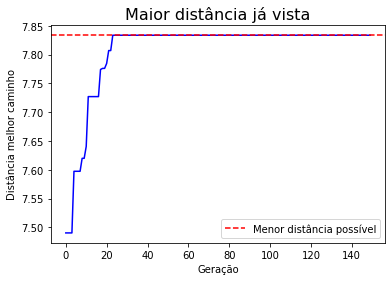

In [7]:
fig, ax = plt.subplots(1, 1)
ax.plot(range(NUM_GERACOES), lista_melhor_fitness, c="b")
ax.axhline(y=melhor_fitness_ever, c="r", linestyle="--", label="Menor distância possível")
ax.set_xlabel("Geração")
ax.set_ylabel("Distância melhor caminho")
ax.set_title("Maior distância já vista", fontsize=16)
ax.legend()

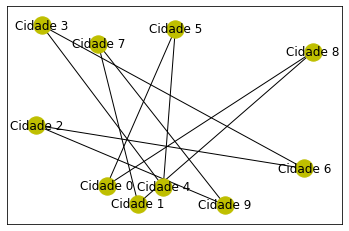

In [8]:
# Representação gráfica:
g = nx.Graph()
for i in list(CIDADES.keys()):
    g.add_node(i)
k = -1
while k < len(melhor_individuo_ja_visto)-1:
    g.add_edge(melhor_individuo_ja_visto[k], melhor_individuo_ja_visto[k+1])
    k+=1
vertices = CIDADES.keys()
pos = nx.spring_layout(g,pos=CIDADES, fixed = vertices)
nx.draw_networkx(g,pos,node_color = 'y')

## Conclusão



Para a primeira parte do problema, eu simplesmente copiei o notebook do experimento do caixeiro viajante, e troquei a função selecao_torneio_min para selecao_torneio_max, que eu já havia criado para o problema da liga ternária mais cara. Também mudei um pouco o script para registrar o maior fitness já visto, ao invés do menor, e também a busca exaustiva para achar o maior caminho. <br>
<br>
Para gerar a representação gráfica do resultado usei a bibloteca networkx, para criar um grafo cujos vértices são as cidades, com as posições determinadas pelo dicionário CIDADES, e as conexões determinadas pelo resultado de melhor indivíduo encontrado pelo algoritmo genético.